In [4]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
%matplotlib inline  
#from matplotlib import animation
import cartopy.crs as ccrs
from scipy.io import netcdf
from scipy import signal
from netCDF4 import num2date
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import datetime

In [2]:
path='/home/garcia/Documents/PhD/DATA/'
#mfiles=  'GOM025-GSL301.050_y1993-2012.1d_gridT.nc','GOM025-GSL301.001_y1993-2012.1d_gridT.nc'
filenames=sorted(glob.glob('/home/garcia/Documents/PhD/DATA/ENTROPY/day5_average/*.nc'))
mfiles=filenames[0:25]
print(len(mfiles))
print(len(filenames))
mean_file=mfiles[0]

20
20


In [3]:
ds = xr.open_mfdataset(mfiles,concat_dim='time')
dsl=xr.open_dataset(path+'GOM/GOM025-GSL301.041_y1993-2012.1d_gridT.nc')
print(ds)
print(ds.time[74:80].data)
lats=dsl.nav_lat
lons=dsl.nav_lon
time2=dsl.time_centered
print(time2.shape)

<xarray.Dataset>
Dimensions:  (lat: 141, lon: 201, time: 1460)
Coordinates:
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    S        (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
[1 2 3 4 5 6]
(7300,)


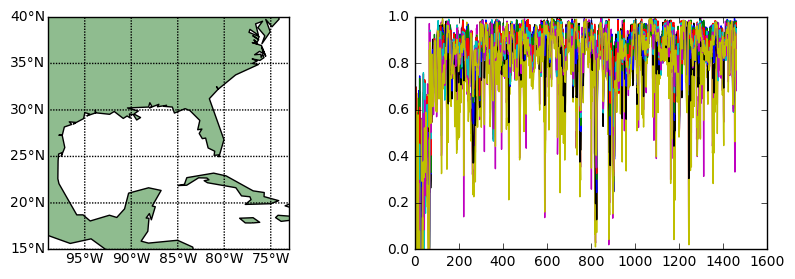

In [92]:
la=17; la1=17;la2=29
lo=69; lo1=40; lo2=58

fig=plt.figure(figsize=(10.0,3.0))
axes1=fig.add_subplot(1,2,1)
llcrnrlon = -99
llcrnrlat = 15
urcrnrlon = -73
urcrnrlat = 40
proj='cyl'
m = Basemap(llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
                projection=proj)
m.fillcontinents(color='darkseagreen')
myo, mxo =m(ds.lat[la],ds.lon[lo])#mx,my= m(24,-85)

parallels = np.arange(-100.,81.,5.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(0.,351.,5.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawcoastlines()
m.plot(mxo,myo,color='cyan',linestyle='solid',linewidth=2)

axes2=fig.add_subplot(1,2,2)
axes2.plot(np.squeeze(ds.sel(lat=slice(la1,la2),lon=slice(lo,lo))['S']))
         

                     
plt.show()

In [15]:
print(time2[-1])
time3 = pd.date_range('1993-01-01','2012-12-26' , freq='5D')
print(time3.shape)


<xarray.DataArray 'time_centered' ()>
numpy.datetime64('2012-12-26T12:00:00.000000000')
Coordinates:
    time_centered  datetime64[ns] 2012-12-26T12:00:00
    time_counter   datetime64[ns] 2012-12-26T12:00:00
Attributes:
    standard_name: time
    long_name: Time axis
    title: Time
    time_origin: 1958-01-01 00:00:00
    bounds: time_centered_bounds
(1460,)


In [123]:
def runningMean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

In [130]:
def pad(l, content, width):
    l.extend([content] * (width - len(l)))
    return l

In [21]:
def running_mean(x, N):
    scumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (scumsum[N:] - scumsum[:-N]) / N 

In [155]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N,mode='valid')[(N-1):]

[ 1.         -4.21851408  7.17077102 -6.13393653  2.63864598 -0.45639581]
[  1.78302502e-05   8.91512508e-05   1.78302502e-04   1.78302502e-04
   8.91512508e-05   1.78302502e-05]


/home/garcia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


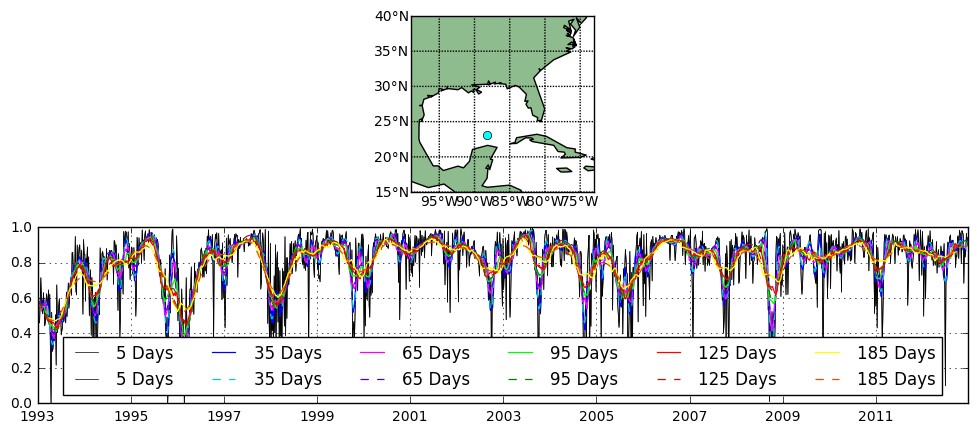

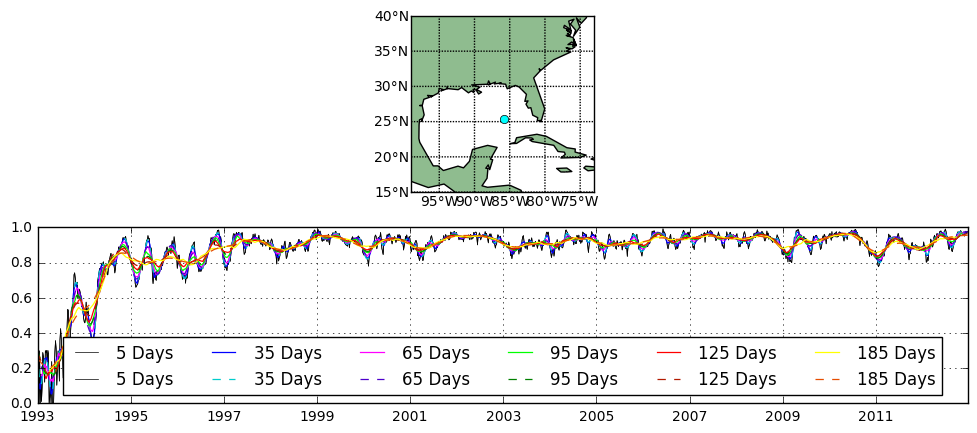

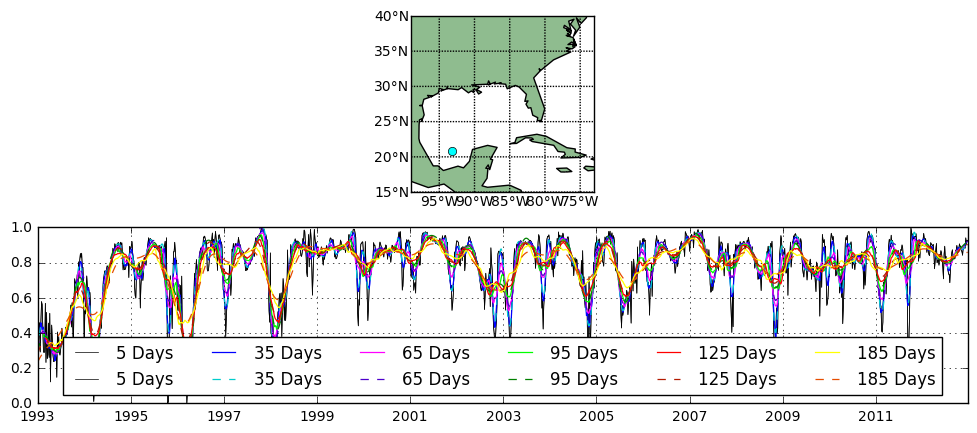

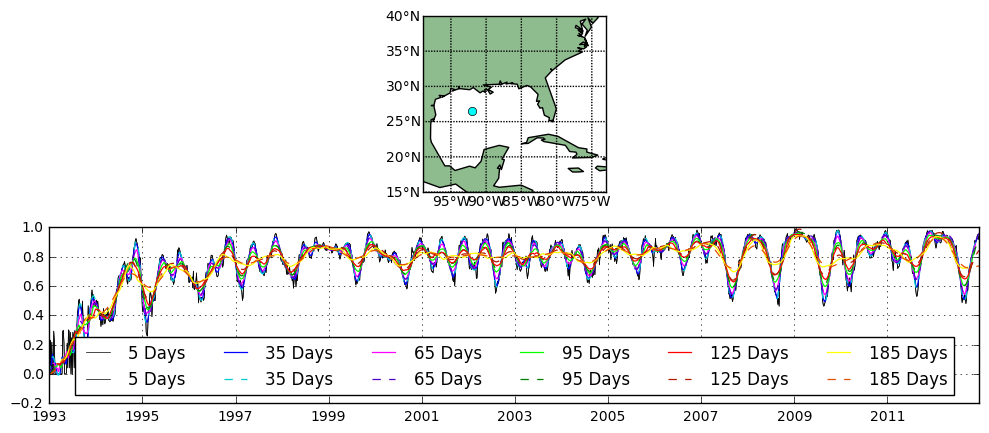

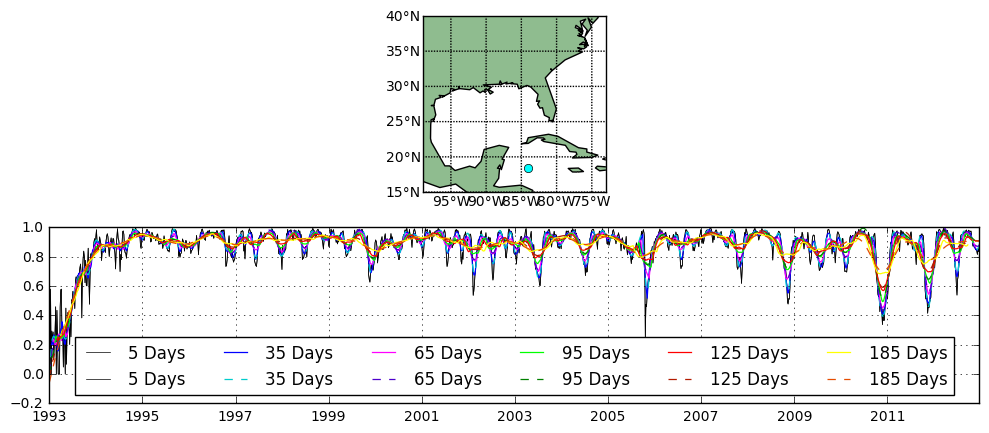

In [104]:
sta=0
la=80; la1=17;la2=29
lo=40; lo1=40; lo2=58
win=90./5
mlo=[40,50,20,25,57]
mla=[80,90,70,95,60]
its=0
for item in mlo:
    
    sf,sf2=plot_st_map_filter(ds,mlo[its],mla[its],its)
    its=its+1

In [103]:
def plot_st_map_filter(sx,lo,la,sta,windows=[7,13,19,25,37]):
    time3 = pd.date_range('1993-01-01','2012-12-26' , freq='5D')
    x=np.squeeze(sx.sel(lat=slice(la,la),lon=slice(lo,lo))['S'])
    fig=plt.figure(figsize=(12.0,5.0))
    axes1=fig.add_subplot(2,1,1)
    llcrnrlon = -99
    llcrnrlat = 15
    urcrnrlon = -73
    urcrnrlat = 40
    proj='cyl'
    m = Basemap(llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
                projection=proj)
    m.fillcontinents(color='darkseagreen')
    myo, mxo =m(lats[la,lo],lons[la,lo])#mx,my= m(24,-85)
    parallels = np.arange(-100.,81.,5.)
    m.drawparallels(parallels,labels=[1,0,0,1])
    meridians = np.arange(0.,351.,5.)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    m.drawcoastlines()
    m.plot(mxo,myo,color='cyan',marker='o',markersize=6)
    #fig=plt.figure(figsize=(10.0,3.0))
    axes2=fig.add_subplot(2,1,2)
    axes2.plot(time3,x,color='black',label='5 Days',linewidth=0.5)
    axes2.plot(time3,x,color='black',label='5 Days',linewidth=0.5)
    #axes2.plot(time3,x,color='black',label='',linewidth=0.5)
  

    #windows=[60,90,120,180,365]
    #windows=[7,13,19,25,37]
    ids=0
    for item in windows:
        win=windows[ids]
        xpad=np.pad(x.values,win/2,mode='mean')
        deltat=5
        fs=1./win
        b,a=signal.butter(3,fs)
        #print(win)
        rx=pd.rolling_mean(x.values,win,center=True)
        rx2=signal.filtfilt(b,a,x.values)
        #rx=runningMeanFast(x.values,win)
        #rx=rx2[win/2:-win/2]
        #print(rx2.shape)
        #print(time3[(win-1):-(win-1)].shape)
        colors=['cyan','green','yellow','red','black']
        colors=[(0,0,1),(1,0,1),(0,1,0),(1,0,0),(1,1,0)]
        colors2=[(0,0.8,.8),(.3,0,.8),(0,.5,0),(.7,.1,0),(.9,.3,0)]
        colorgr2=(np.random.random(3))
        colorgr=colors[ids] 
        colorgr2=colors2[ids] 
        #rint(colorgr)
        axes2.plot(time3,rx,color=colorgr,label='%s Days' %(win*5),linewidth=.9)
        axes2.plot(time3,rx2,color=colorgr2,label='%s Days' %(win*5),linewidth=.9,linestyle='dashed')
        
        ids=ids+1
    #axes2.plot(time3,x,color='black',label='5 Days',linewidth=0.1)
    axes2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #axes2.xaxis.set_ticks(np.arange())
    axes2.grid()
    plt.legend(loc=8,ncol=len(windows)+1)
    fig.savefig('test_filt_%s.pdf' %sta)
    return rx2, rx

In [10]:
la,lo=80,40
x=np.squeeze(ds.sel(lat=slice(la,la),lon=slice(lo,lo))['S'])
windows=np.arange(1,len(x)/2)
mat=signal.cwt(x.values,signal.morlet,windows)
print(mat.shape)
plt.contourf(mat)

(729, 1460)
